In [1]:
# ALKIN KORKUT

# Importing libraries

# For data manipulation
import numpy as np 
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# I have encountered an error while reading the 'cancer.csv' file, that is :
# 'UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte'
# It is about an issue decoding the file as UTF-8. 
# I tried to solve this problem importing 'chardet' library and then tried to open the dataset.
# 'chardet' library already installed in the python. I didn't need to install again.

!pip install chardet

import chardet

<h1>Load and Read Dataset</h1>

In [3]:
# Detect encoding
with open("cancer.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Load the dataset with detected encoding
df = pd.read_csv("cancer.csv", encoding=result['encoding'])

In [4]:
# Dataset is visible now
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


<h1>Preprocess data</h1>

In [5]:
# Check null data
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [6]:
# Check shape of the dataset: 3047 rows, 34 columns
df.shape

(3047, 34)

In [7]:
# Remove the non-numeric features (#binnedinc, #geography)
df.drop('Geography', axis=1, inplace=True)
df.drop('binnedInc', axis=1, inplace=True)
# Check shape of the dataset: 3047 rows, 32 columns
df.shape

(3047, 32)

In [8]:
# Check null data
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [9]:
# Remove the rows with missing data
df.dropna(axis=0, inplace=True)

In [10]:
# Check null data, no null data now
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [11]:
# Number of samples: 591
numberOfSamples = len(df)
print(numberOfSamples)
# Number of features: 32
numberOfFeatures = len(df.columns)
print(numberOfFeatures)

591
32


In [12]:
# Mean value available here for each feature
statistics = df.describe().transpose()
statistics 

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,591.0,682.316495,1977.289390,6.000000,87.000000,183.000000,542.000000,3.815000e+04
avgDeathsPerYear,591.0,199.411168,708.330454,3.000000,30.000000,64.000000,131.000000,1.401000e+04
TARGET_deathRate,591.0,179.090863,27.273580,94.400000,161.350000,177.900000,195.400000,2.939000e+02
incidenceRate,591.0,452.657990,54.381212,234.000000,425.250000,453.549422,481.550000,1.014200e+03
medIncome,591.0,47032.851100,11405.103542,23047.000000,39305.000000,45235.000000,52686.500000,9.727900e+04
popEst2015,591.0,114552.570220,504352.705204,829.000000,12328.500000,27755.000000,66217.000000,1.017029e+07
povertyPercent,591.0,16.723181,6.219356,4.800000,12.000000,15.600000,19.900000,4.510000e+01
studyPerCap,591.0,122.729567,357.586595,0.000000,0.000000,0.000000,60.953380,3.657320e+03
MedianAge,591.0,45.985787,47.697553,23.200000,38.200000,40.900000,43.600000,5.088000e+02
MedianAgeMale,591.0,39.573266,5.118305,23.700000,36.600000,39.500000,42.250000,5.850000e+01


In [13]:
# Variance value available here for each feature
variance = statistics['std'] ** 2
variance

avgAnnCount                3.909673e+06
avgDeathsPerYear           5.017320e+05
TARGET_deathRate           7.438482e+02
incidenceRate              2.957316e+03
medIncome                  1.300764e+08
popEst2015                 2.543717e+11
povertyPercent             3.868039e+01
studyPerCap                1.278682e+05
MedianAge                  2.275057e+03
MedianAgeMale              2.619705e+01
MedianAgeFemale            2.560445e+01
AvgHouseholdSize           2.027195e-01
PercentMarried             4.182001e+01
PctNoHS18_24               6.168023e+01
PctHS18_24                 8.729796e+01
PctSomeCol18_24            1.217443e+02
PctBachDeg18_24            1.765149e+01
PctHS25_Over               4.706112e+01
PctBachDeg25_Over          2.735581e+01
PctEmployed16_Over         5.952752e+01
PctUnemployed16_Over       1.096550e+01
PctPrivateCoverage         1.093062e+02
PctPrivateCoverageAlone    9.841755e+01
PctEmpPrivCoverage         9.108942e+01
PctPublicCoverage          5.733322e+01


In [14]:
# Correlation matrix
correlationMatrix = df.corr().style.background_gradient()
correlationMatrix

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.963882,-0.128587,0.010871,0.219067,0.957520,-0.105566,0.079980,-0.026047,-0.110806,-0.107927,0.077267,-0.103546,-0.092584,-0.145028,0.103780,0.224268,-0.263704,0.245992,0.177038,-0.000131,0.061000,0.133070,0.131033,-0.164938,-0.072116,-0.138574,0.020755,0.480718,0.276332,-0.086528,-0.036560
avgDeathsPerYear,0.963882,1.000000,-0.096510,0.005936,0.189414,0.988023,-0.048667,0.086374,-0.020042,-0.136011,-0.134683,0.102863,-0.164573,-0.096243,-0.122790,0.093203,0.209481,-0.254167,0.235851,0.116513,0.061478,0.002737,0.088625,0.105198,-0.137201,-0.019233,-0.179069,0.069639,0.486688,0.285097,-0.120332,-0.076831
TARGET_deathRate,-0.128587,-0.096510,1.000000,0.376033,-0.377156,-0.109513,0.366102,-0.033589,-0.011419,-0.026774,0.019737,-0.062568,-0.229908,0.078894,0.254029,-0.158445,-0.296988,0.379753,-0.440073,-0.372085,0.319756,-0.337199,-0.322015,-0.228443,0.346525,0.388474,-0.158205,0.258829,-0.199772,-0.209761,-0.291756,-0.051311
incidenceRate,0.010871,0.005936,0.376033,1.000000,0.064140,-0.018021,-0.021349,0.094944,0.020339,-0.070816,-0.075830,-0.114925,-0.128565,-0.181979,-0.023155,0.108126,0.108046,0.050472,0.042241,0.041587,0.020524,0.161990,0.173349,0.189013,-0.069795,-0.061571,-0.029996,0.102696,0.076300,-0.208808,-0.141188,-0.103238
medIncome,0.219067,0.189414,-0.377156,0.064140,1.000000,0.177701,-0.796091,0.115285,-0.003541,-0.079002,-0.128884,0.117188,0.342108,-0.316687,-0.212364,0.219625,0.487486,-0.449718,0.708231,0.692095,-0.440293,0.729939,0.786730,0.757948,-0.764296,-0.733614,0.190445,-0.270956,0.465658,0.078734,0.468958,-0.079201
popEst2015,0.957520,0.988023,-0.109513,-0.018021,0.177701,1.000000,-0.039724,0.073192,-0.021496,-0.145278,-0.148584,0.112381,-0.145022,-0.083482,-0.117614,0.088527,0.186542,-0.254249,0.223135,0.115205,0.048669,-0.006393,0.081420,0.091063,-0.141193,-0.020699,-0.172378,0.055595,0.479433,0.299631,-0.097910,-0.061795
povertyPercent,-0.105566,-0.048667,0.366102,-0.021349,-0.796091,-0.039724,1.000000,-0.093313,-0.016437,-0.233281,-0.181874,0.061160,-0.627303,0.302635,0.133819,-0.171781,-0.411651,0.183586,-0.516318,-0.745129,0.648611,-0.814308,-0.743404,-0.674968,0.634122,0.790520,-0.529978,0.528894,-0.168474,0.060031,-0.598793,0.024339
studyPerCap,0.079980,0.086374,-0.033589,0.094944,0.115285,0.073192,-0.093313,1.000000,-0.027249,-0.060887,-0.078092,0.011451,-0.031118,-0.136710,-0.037298,0.081161,0.125690,-0.151372,0.163404,0.171909,-0.045224,0.120519,0.142935,0.155486,-0.113575,-0.082975,0.021907,-0.017010,0.098969,0.003875,-0.051405,-0.024016
MedianAge,-0.026047,-0.020042,-0.011419,0.020339,-0.003541,-0.021496,-0.016437,-0.027249,1.000000,0.075247,0.099255,-0.036585,0.027442,-0.011858,0.017716,-0.003276,-0.008663,0.048341,-0.026124,-0.029754,0.051701,0.019211,-0.008464,-0.012627,0.034639,-0.006858,0.016302,0.018361,-0.054970,-0.017505,-0.005902,0.004128
MedianAgeMale,-0.110806,-0.136011,-0.026774,-0.070816,-0.079002,-0.145278,-0.233281,-0.060887,0.075247,1.000000,0.928813,-0.365616,0.484189,0.121405,0.186905,-0.236731,-0.021145,0.303251,-0.145582,-0.095169,-0.177902,0.054771,-0.190114,-0.217323,0.384922,0.006612,0.416602,-0.260831,-0.316228,-0.265851,0.206939,-0.037352


/Users/alkinkorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


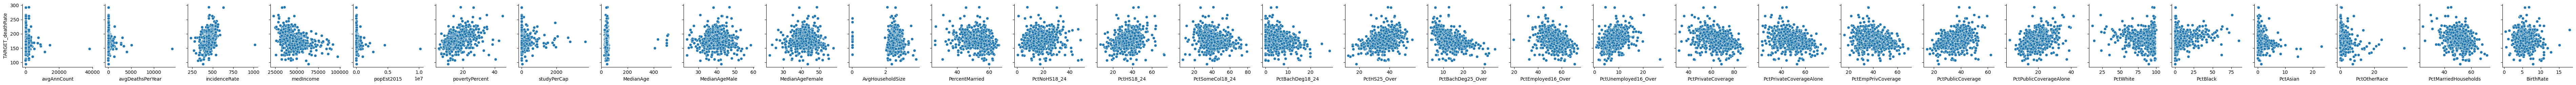

In [15]:
targetColumn = 'TARGET_deathRate'
# Move the target column to the last index of the dataframe
df = df[[col for col in df.columns if col != targetColumn] + [targetColumn]]

# Create scatter diagrams to visualize the relationship between 
# the death rate (the target) and other features separately
pairplot = sns.pairplot(df, x_vars=df.columns[:-1], y_vars='TARGET_deathRate', kind='scatter')
pairplot.savefig('pairplot.png')
plt.show()


In [16]:
X = df.drop('TARGET_deathRate', axis=1) # X values does not include target values
y = df['TARGET_deathRate'] # y values does include only target values
# Splitting the data as train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=271)

In [17]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,472.0,610.728194,1171.309931,6.000000,91.750000,187.500000,546.250000,1.447700e+04
avgDeathsPerYear,472.0,171.000000,395.290245,3.000000,30.000000,65.000000,133.250000,5.108000e+03
incidenceRate,472.0,453.227493,55.352450,234.000000,425.600000,453.549422,481.850000,1.014200e+03
medIncome,472.0,46948.775424,11782.597929,23047.000000,38604.500000,45070.500000,52590.000000,9.727900e+04
popEst2015,472.0,94622.016949,278282.208403,829.000000,12610.000000,27994.000000,68572.500000,4.538028e+06
povertyPercent,472.0,16.835381,6.242141,4.800000,12.075000,15.850000,20.325000,4.510000e+01
studyPerCap,472.0,118.222931,352.360866,0.000000,0.000000,0.000000,52.139751,3.657320e+03
MedianAge,472.0,46.431780,50.603935,23.200000,38.200000,40.850000,43.600000,5.088000e+02
MedianAgeMale,472.0,39.507203,5.047203,23.800000,36.600000,39.500000,42.200000,5.620000e+01
MedianAgeFemale,472.0,42.004237,5.030377,22.300000,39.300000,42.250000,44.800000,5.800000e+01


In [18]:
# Removing outliers using Z-score technique
z_scores = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
outliers = (np.abs(z_scores) > 3).all(axis=1)
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]

In [19]:
from sklearn.preprocessing import StandardScaler                        

# Scaling using StandartScaler
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train_no_outliers)
X_testScaled = scaler.transform(X_test)

In [20]:
# type(X_trainScaled) --> numpy array
# type(X_testScaled)  --> numpy array
# type(y_train_no_outliers) --> pandas series
# type(y_test) --> pandas series

# Converting pandas DataFrames and series to numpy arrays
# Already numpy array X_trainScaled
# Already numpy array X_testScaled 
y_train = np.array(y_train_no_outliers.values)
y_test = np.array(y_test.values)

# Now after from here, X_trainScaled, X_testScaled, y_train and y_test will be used as numpy arrays.

<h1>Ordinary Least Squares</h1>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def ordinary_least_squares(X_train, X_test, y_train, y_test, numFeatures):
    # Select the first 'num_features' features.
    selectedFeatures = X_train[:, :numFeatures]
    
    # Fit the model with LinearRegression().
    model = LinearRegression()
    model.fit(selectedFeatures, y_train)
    
    # Make predictions on the test set.
    selectedFeaturesTest = X_test[:, :numFeatures]
    y_pred = model.predict(selectedFeaturesTest)
    
    # Evaluate the model by calculating mse, mae, and r2 score.
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, mae, r2

results = {}

# Evaluating models for F = 5, 10, 20 values
for numOfFeatures in [5, 10, 20]:
    model, mse, mae, r2 = ordinary_least_squares(X_trainScaled, X_testScaled, y_train, y_test, numOfFeatures)
    
    # Storing results in the dictionary
    results[numOfFeatures] = {
        'f_value': numOfFeatures,
        'model': model,
        'mse': mse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"\nResults for {numOfFeatures} features:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    
# Identifying the best model (The best model is with lowest MSE)
bestModelKey = min(results, key=lambda k: results[k]['mse'])
bestModel = results[bestModelKey]['model']

print("\n")
print("---- RESULT ----")
# Printing the best model
print("The Best Model with f value", results[bestModelKey]['f_value'])
print(f"{bestModel} with mse:", results[bestModelKey]['mse'])
print("with mae:", results[bestModelKey]['mae'])
print("with R2 score:", results[bestModelKey]['r2'])


# Printing the linear equation for the best model 
print("\nLinear Equation for the Best Model:")
equation = f"y = {bestModel.intercept_} "
for i, coef in enumerate(bestModel.coef_):
    equation += f"+ ({coef} * X_{i}) "
print(equation)




Results for 5 features:
MSE: 463.51974876777234
MAE: 16.07056016183814
R2 Score: 0.3100302483143771
Coefficients: [ -4.79333086  10.0087527   10.12404938 -11.27436885  -5.35973882]
Intercept: 179.33326271186442

Results for 10 features:
MSE: 443.1639611822952
MAE: 15.64879809384971
R2 Score: 0.34033074304637934
Coefficients: [-4.37843822  8.99460824 10.25193451 -7.60562729 -5.0248862   4.01793302
 -0.44724573 -0.82089988 -2.19776472  3.79246302]
Intercept: 179.33326271186442

Results for 20 features:
MSE: 446.0138685405535
MAE: 15.308115424103127
R2 Score: 0.3360885292517528
Coefficients: [-1.79565472e+00  7.15418346e+00  9.31413288e+00 -9.13674545e-01
 -4.42582484e+00  2.14458324e+00  3.57875570e-02 -1.22942575e+00
 -4.95286280e-01 -3.42388629e-02 -3.28715947e-01 -7.88766000e-01
 -7.28401451e+01 -8.03662482e+01 -9.88841428e+01 -4.05484774e+01
  4.49185785e+00 -4.33834617e+00 -1.39613724e+00  3.20616655e+00]
Intercept: 179.33326271186442


---- RESULT ----
The Best Model with f value 

<h1>Gradient Descent Implementation</h1>

Results for learning rate 0.1:
Weights: [-0.92531662  3.09442635  8.35931988  0.64072013 -1.27041053 -0.30584311
 -0.32105436 -1.24775457 -0.85493468 -0.97927522  0.53846628  6.64534416
 -1.97006177  2.55388191  0.32916207 -3.00216434  3.19750232 -5.20617308
 -4.20315507  2.67502082 -4.54455691 -1.58242223  5.68186561 -2.65197347
  2.0254707   3.0561517   2.57411658 -0.06229792 -3.26228576 -8.85048084
 -0.22830118], Bias: 179.3332626753336


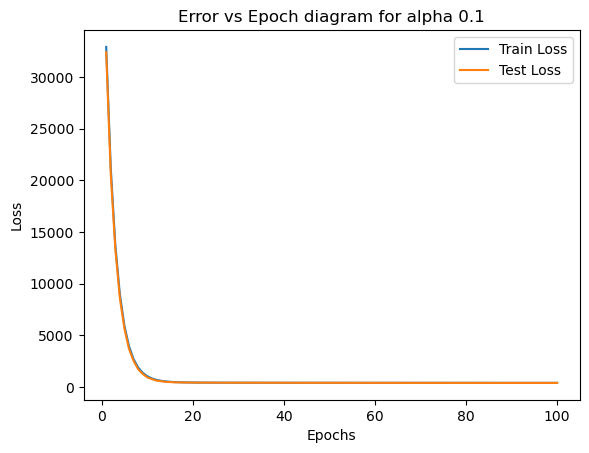

----Losses for train data for the model with alpha val: 0.1----
[32920.56489407 21234.79277401 13764.27188872  8984.01177293
  5923.16770606  3962.01516558  2704.53932501  1897.52206472
  1378.98575924  1045.2850814    830.08166426   690.90336955
   600.54913619   541.59119701   502.85785034   477.18295149
   459.96570787   448.24888533   440.12871977   434.37709433
   430.1995659    427.08034557   424.6829447    422.78646287
   421.24470207   419.95990372   418.86585685   417.91701499
   417.08146817   416.33639063   415.66508025   415.05502294
   414.49661852   413.98233458   413.50613833   413.06310996
   412.64917518   412.26091659   411.89543802   411.55026446
   411.22326681   410.91260368   410.61667571   410.33408879
   410.06362411   409.8042133    409.55491768   409.31491068
   409.08346298   408.85992963   408.6437392    408.4343842
   408.23141303   408.0344228    407.84305327   407.65698149
   407.47591719   407.29959877   407.12778975   406.96027579
   406.79686199   406.

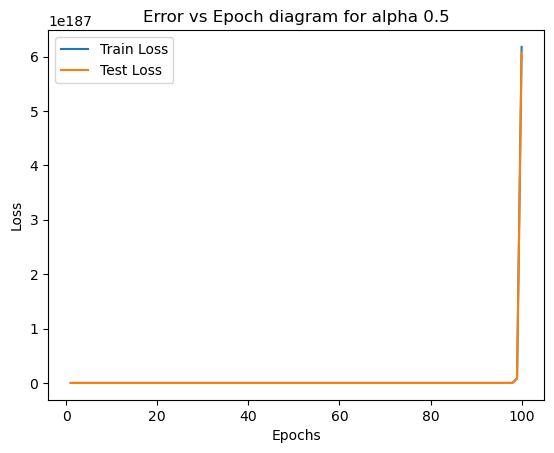

----Losses for train data for the model with alpha val: 0.5----
[3.29205649e+004 1.16429103e+004 8.36009003e+005 6.26290834e+007
 4.69552586e+009 3.52060538e+011 2.63970445e+013 1.97922120e+015
 1.48399898e+017 1.11268677e+019 8.34280819e+020 6.25534973e+022
 4.69019537e+024 3.51665910e+026 2.63675397e+028 1.97701037e+030
 1.48234156e+032 1.11144409e+034 8.33349079e+035 6.24836366e+037
 4.68495729e+039 3.51273165e+041 2.63380921e+043 1.97480241e+045
 1.48068606e+047 1.11020282e+049 8.32418383e+050 6.24138539e+052
 4.67972506e+054 3.50880858e+056 2.63086773e+058 1.97259692e+060
 1.47903240e+062 1.10896292e+064 8.31488725e+065 6.23441492e+067
 4.67449867e+069 3.50488989e+071 2.62792954e+073 1.97039390e+075
 1.47738060e+077 1.10772442e+079 8.30560106e+080 6.22745223e+082
 4.66927812e+084 3.50097557e+086 2.62499462e+088 1.96819333e+090
 1.47573064e+092 1.10648730e+094 8.29632525e+095 6.22049732e+097
 4.66406340e+099 3.49706563e+101 2.62206299e+103 1.96599522e+105
 1.47408252e+107 1.1052515

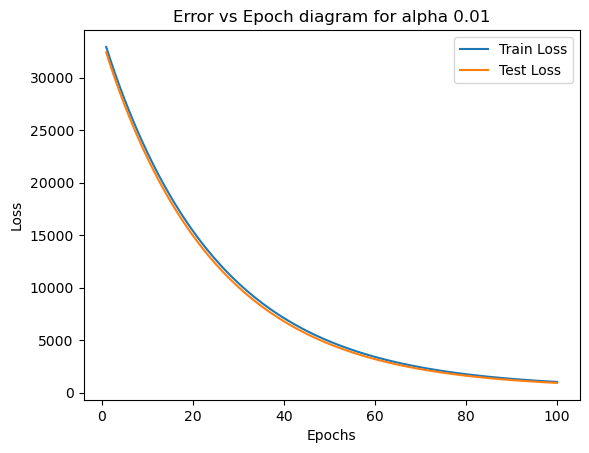

----Losses for train data for the model with alpha val: 0.01----
[32920.56489407 31584.80725505 30318.22586744 29112.45910501
 27961.43378387 26860.591853   25806.38593359 24795.94991882
 23826.88357843 22897.11142012 22004.78993107 21148.24635198
 20325.93801488 19536.42510189 18778.35217384 18050.43543921
 17351.45378966 16680.24231591 16035.6874655  15416.72329503
 14822.32845964 14251.52370592 13703.36971511 13176.96519571
 12671.44515922 12185.97933456 11719.77069185 11272.05405523
 10842.09479106 10429.1875617  10032.65513781  9651.84726408
  9286.13957414  8934.9325516   8597.6505345   8273.74076074
  7962.67245269  7663.93593901  7377.04181202  7101.52011913
  6836.91958686  6582.80687606  6338.76586709  6104.39697359
  5879.31648391  5663.15592875  5455.56147431  5256.19333957
  5064.72523696  4880.84383533  4704.24824449  4534.64952023
  4371.77018914  4215.34379242  4065.11444792  3920.83642956
  3782.27376362  3649.19984108  3521.39704545  3398.65639535
  3280.77720147  316

In [22]:
def gradient_descent(X_train, X_test, y_train, y_test, alpha, numOfIterations):
    
    # 'Weights' correspond to coefficients for the features in the input data.
    # 'Bias' corresponds to intercept in the linear equation
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    # 'Epochs' correspond to the number of times the gradient descent 
    # algorithm will iterate through the entire dataset
    epochs = numOfIterations
    
    # Declaring numpy arrays in order to store the error 
    # losses calculated for training and test sets here
    trainLosses = []
    testLosses = []
    
    # Each time iterate through the entire dataset
    for ep in range(epochs):
        
        # Calculating predictions and loss for the training set
        yTrainPred = np.dot(X_train, weights) + bias
        trainLoss = np.mean(np.square(yTrainPred - y_train))
        trainLosses = np.append(trainLosses ,trainLoss)
        
        # Calculating predictions and loss for the test set
        yTestPred = np.dot(X_test, weights) + bias
        testLoss = np.mean(np.square(yTestPred - y_test))
        testLosses = np.append(testLosses,testLoss)
        
        # Updating weights and bias using gradient descent in 
        # the opposite direction of the gradients in order
        # to minimize the loss
        weights = weights - alpha * (2/len(X_train)) * np.dot(X_train.T, (yTrainPred - y_train))
        bias =  bias - alpha * (2/len(X_train)) * np.sum(yTrainPred - y_train)
    
    return weights, bias, trainLosses, testLosses

# Train models with different learning rates
learningRates = [0.1, 0.5, 0.01]

for alpha in learningRates:
    weights, bias, trainLosses, testLosses = gradient_descent(X_trainScaled, X_testScaled, y_train, y_test, 
                                                              alpha, 100)
    print(f"Results for learning rate {alpha}:")
    print(f"Weights: {weights}, Bias: {bias}")
    # Plot the epoch-loss diagram
    plt.plot(range(1, len(trainLosses)+1), trainLosses, label='Train Loss')
    plt.plot(range(1, len(testLosses)+1), testLosses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Error vs Epoch diagram for alpha {alpha}')
    plt.legend()
    plt.show()
    print(f"----Losses for train data for the model with alpha val: {alpha}----")
    print(trainLosses)
    print("\n")
    print(f"----Losses for test data for the model with alpha val: {alpha}----")
    print(testLosses)
    print("-----------------------------------------------------\n")
    



<h1>KNN-Regression Implementation</h1>

In [23]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression(X_train, X_test, y_train, y_test, k):
    # Applying KNN Regressor
    model = KNeighborsRegressor(n_neighbors=k)
    # Fit the model
    model.fit(X_train, y_train)
    # Predict 
    yPred = model.predict(X_test)
    # Calculate MSE 
    mse = mean_squared_error(y_test, yPred)
    
    return model, mse

# K values
kValues = [3, 5, 10]
results = {}
for k in kValues:
    model, mse = knn_regression(X_trainScaled, X_testScaled, y_train, y_test, k)
    # Using dictionary for results
    results[k] = {
        'model': model,
        'mse': mse
    }
    print(f"Results for K={k}:")
    print(f"MSE: {mse}")
    print("   =", round(mse))
    print("----")
    
# Identifying the best model (The best model is with lowest MSE)
bestModelKey = min(results, key=lambda k: results[k]['mse'])
bestModel = results[bestModelKey]['model']

print("---- RESULT ----")
# Printing the best model with k value
print("The Best Model with k value:")
print(f"{bestModel} with mse:", results[bestModelKey]['mse'])

Results for K=3:
MSE: 495.06725490196055
   = 495
----
Results for K=5:
MSE: 478.1488806722688
   = 478
----
Results for K=10:
MSE: 476.60784285714266
   = 477
----
---- RESULT ----
The Best Model with k value:
KNeighborsRegressor(n_neighbors=10) with mse: 476.60784285714266
